<a href="https://colab.research.google.com/github/AdrienVansuyt/Final_Thesis2_Engufing_Researches/blob/main/4_Analyse_GOLD_Englobantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse englobantes GOLD**

## **Nous allons comme avec le BTC précédement analyser les englobantes haussières et baissières sur le gold.**



In [2]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=d3634f39518b057c8591e70638d4f3b89393fb46137925d635d7cf12ded67961
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


[*********************100%%**********************]  1 of 1 completed


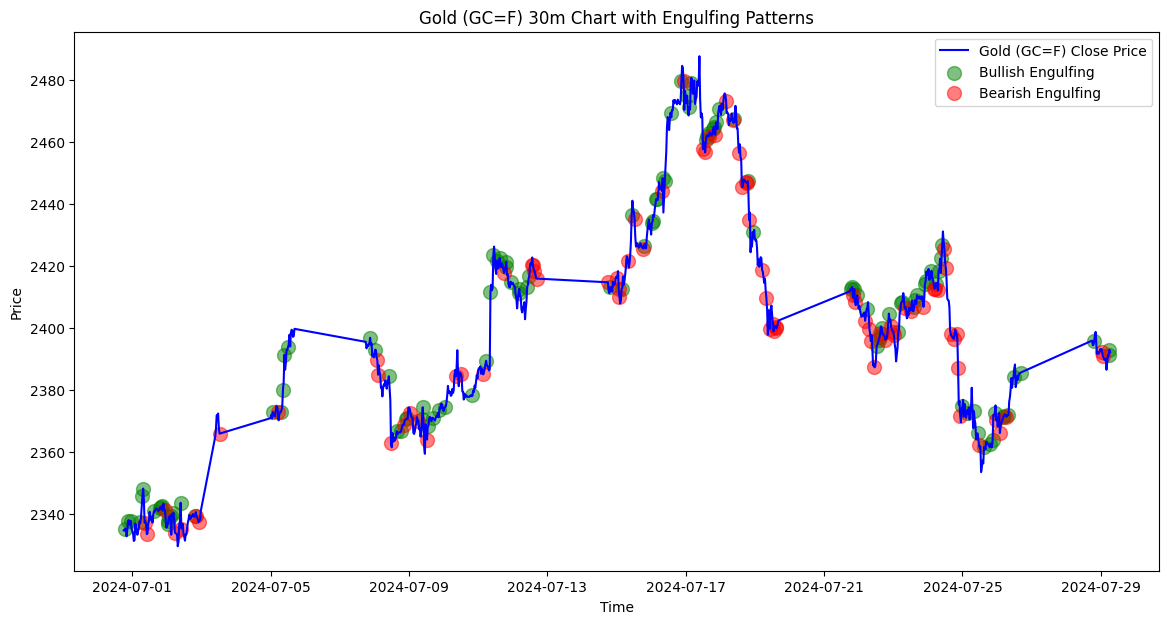

[*********************100%%**********************]  1 of 1 completed


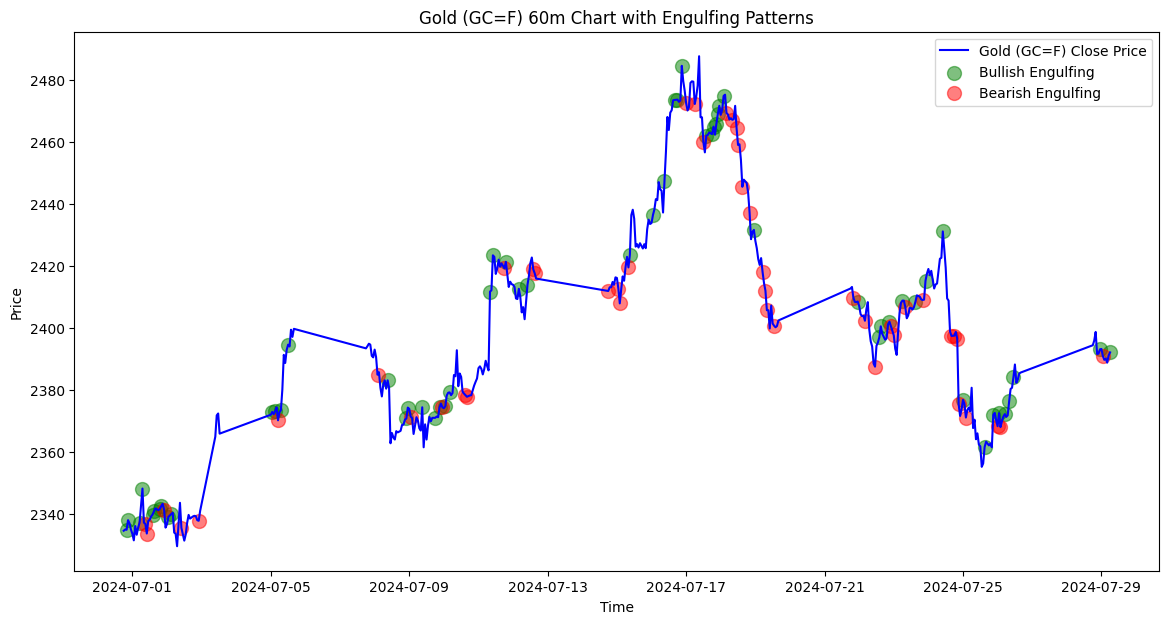

[*********************100%%**********************]  1 of 1 completed


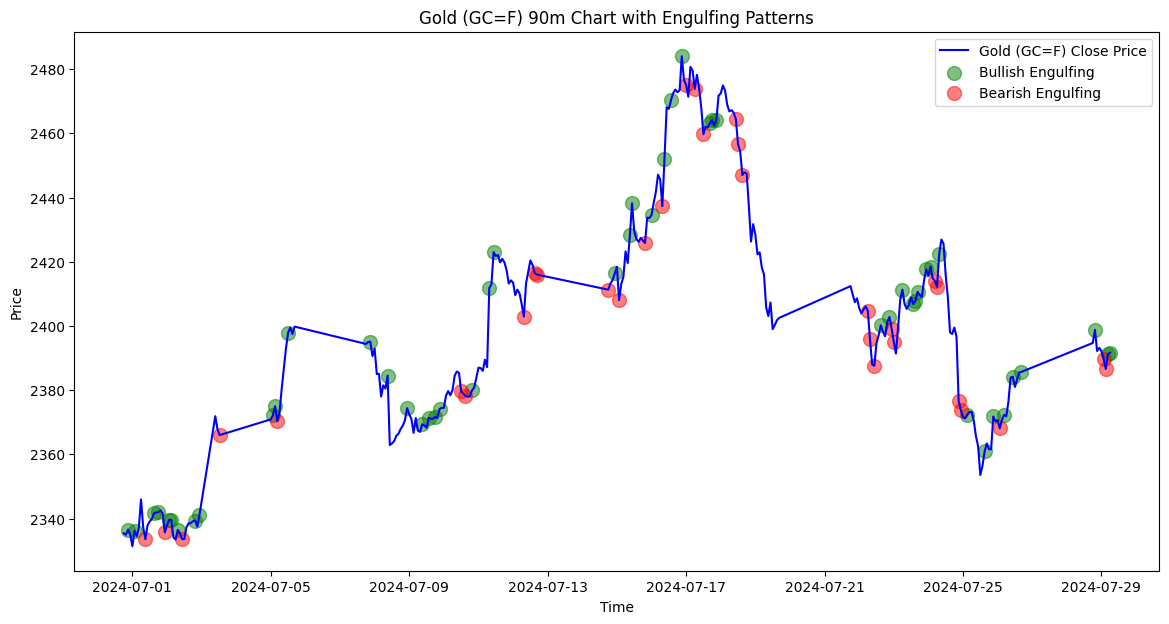

[*********************100%%**********************]  1 of 1 completed


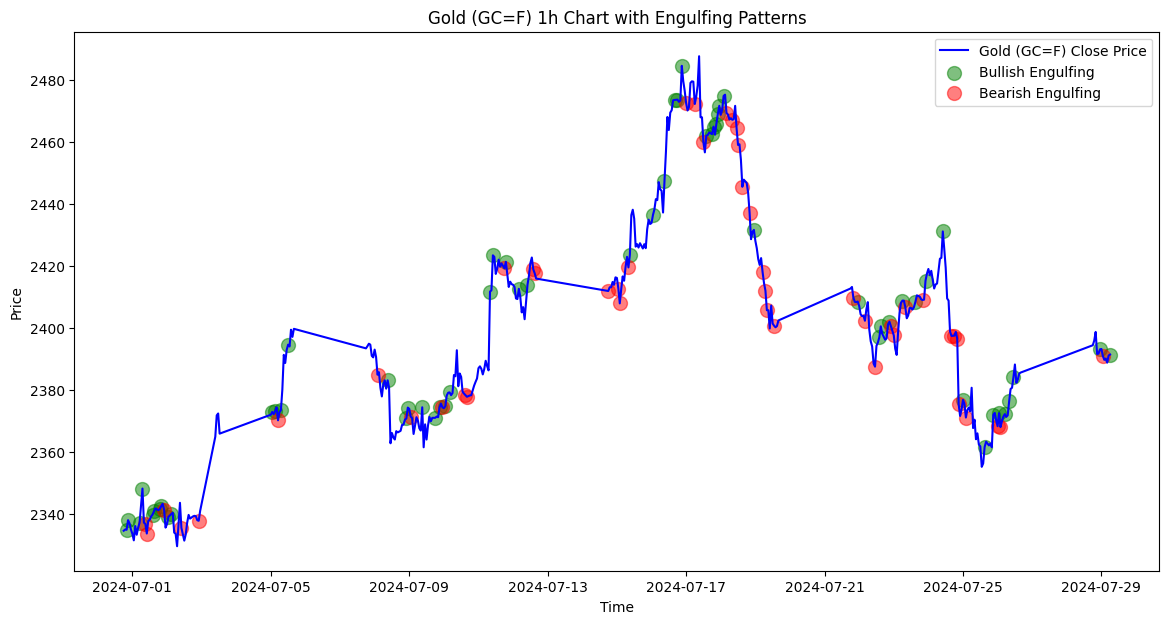

[*********************100%%**********************]  1 of 1 completed


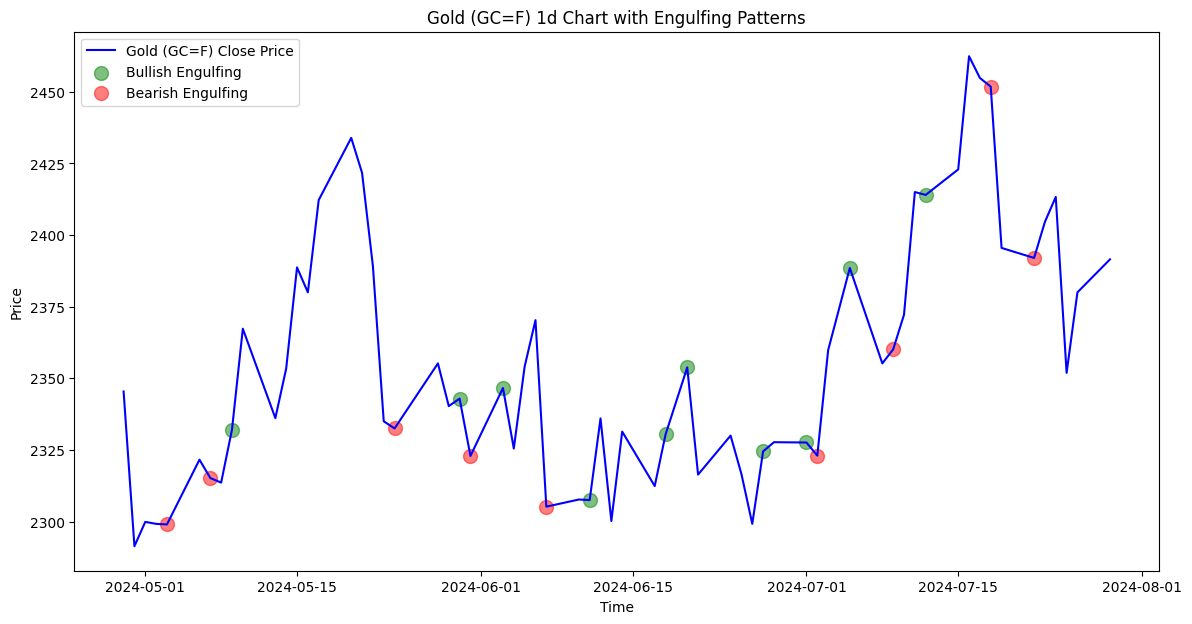

[*********************100%%**********************]  1 of 1 completed


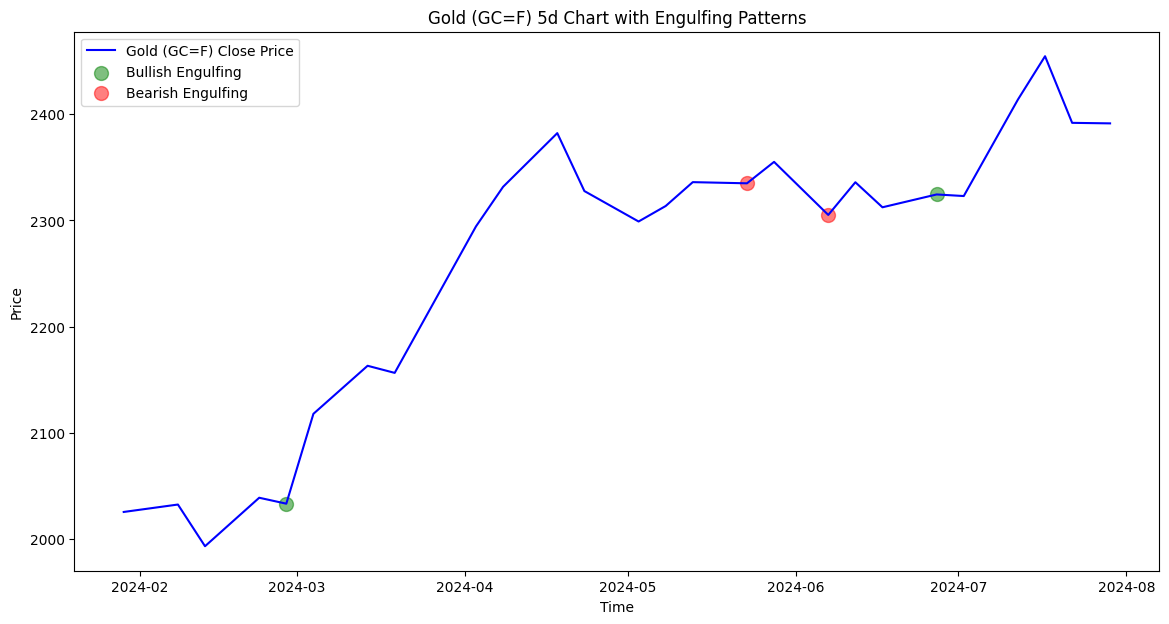

[*********************100%%**********************]  1 of 1 completed


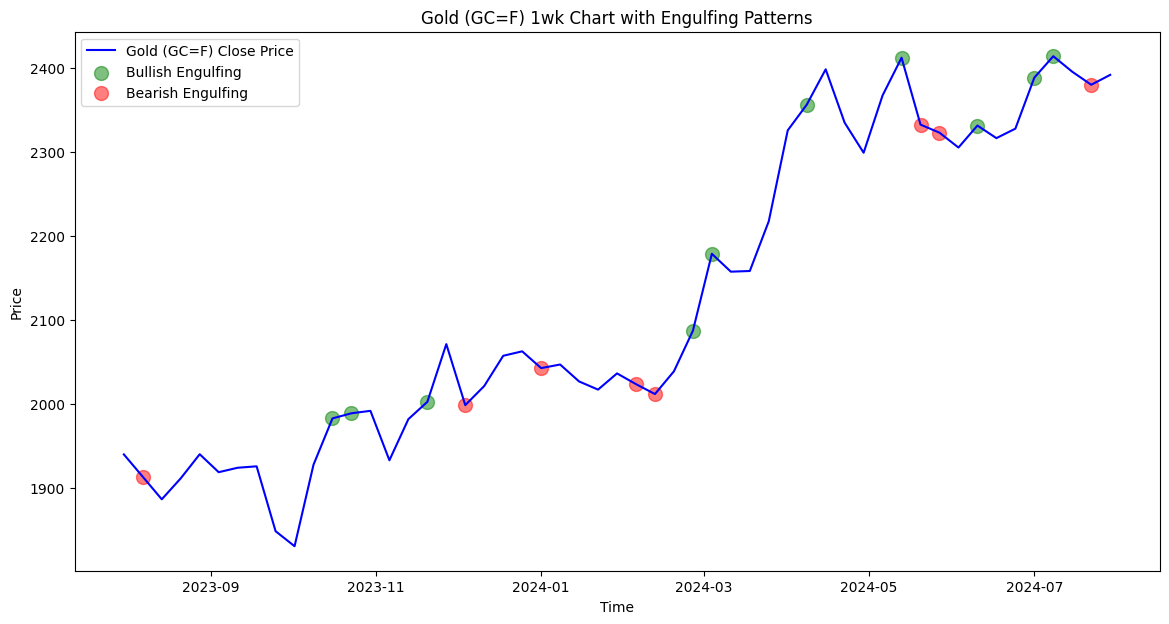

[*********************100%%**********************]  1 of 1 completed


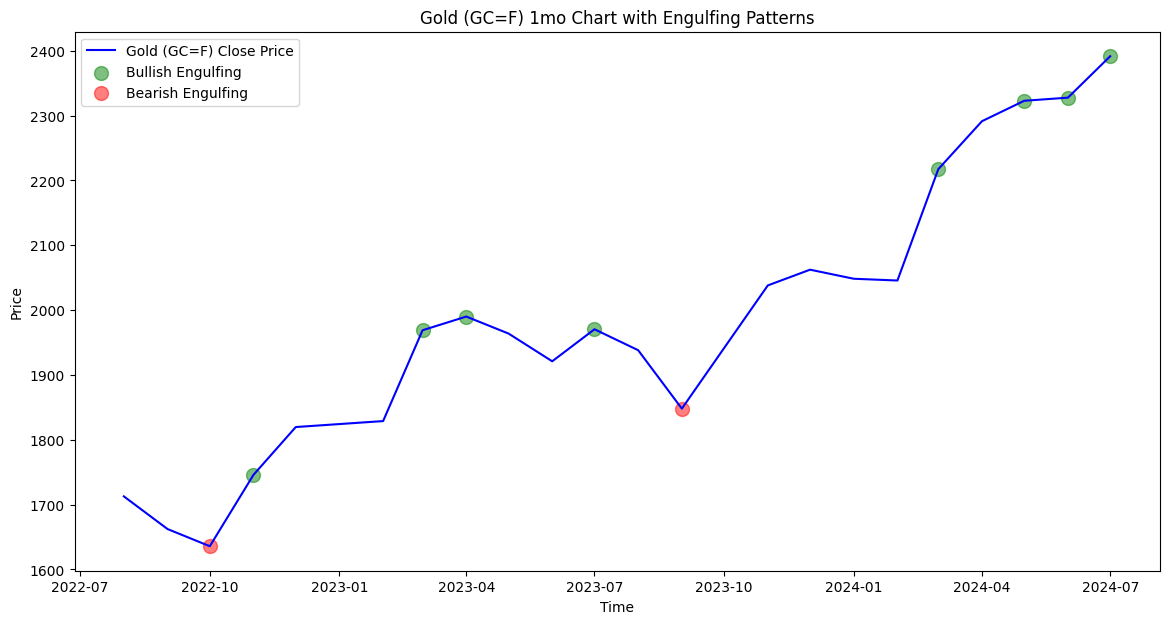

[*********************100%%**********************]  1 of 1 completed


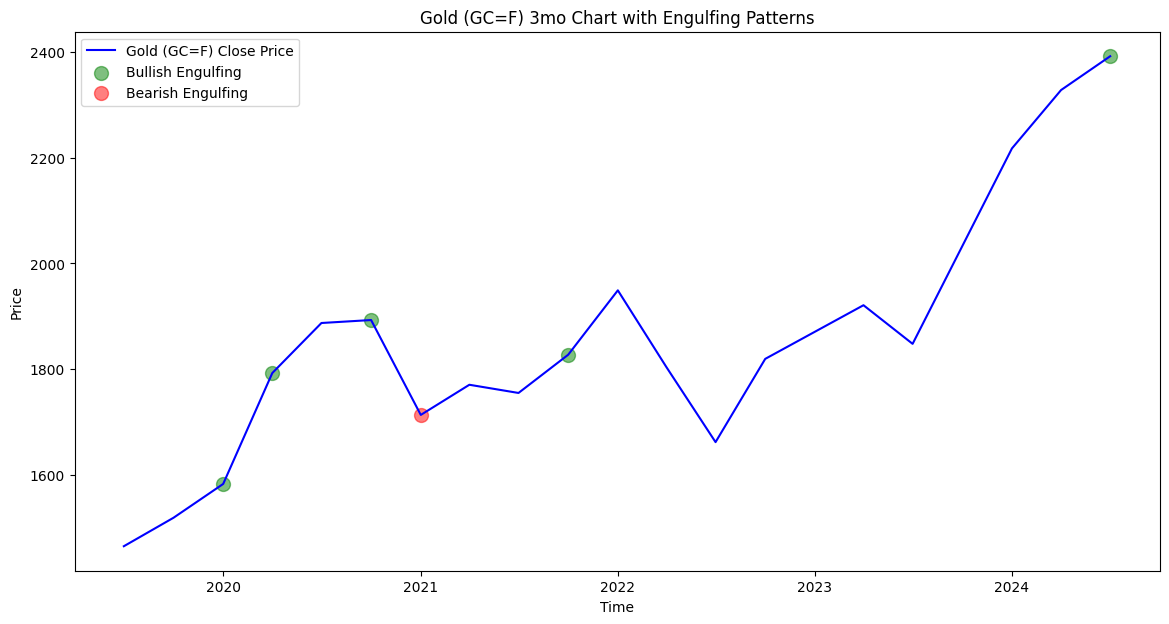

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Liste des unités de temps (ordonnée du plus petit au plus grand)
timeframes = ['30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Mapper les unités de temps avec des périodes compatibles
period_map = {
    '30m': '1mo',
    '60m': '1mo',
    '90m': '1mo',
    '1h': '1mo',
    '1d': '3mo',
    '5d': '6mo',
    '1wk': '1y',
    '1mo': '2y',
    '3mo': '5y'
}

# Fonction pour détecter les patterns englobantes
def detect_engulfing(data):
    signals = {'bullish_engulfing': [], 'bearish_engulfing': []}
    for i in range(1, len(data)):
        # Bullish Engulfing
        if data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and data['Close'][i] > data['Open'][i]:
            signals['bullish_engulfing'].append(i)

        # Bearish Engulfing
        elif data['Open'][i] > data['Close'][i-1] and data['Close'][i] < data['Open'][i-1] and data['Close'][i] < data['Open'][i]:
            signals['bearish_engulfing'].append(i)

    return signals

# Télécharger les données du Gold et détecter les patterns pour chaque unité de temps
gold_ticker = 'GC=F'

for tf in timeframes:
    period = period_map[tf]
    data = yf.download(gold_ticker, period=period, interval=tf)
    if not data.empty:
        signals = detect_engulfing(data)

        # Tracer le graphique
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='Gold (GC=F) Close Price', color='blue')

        # Ajouter les pastilles pour les patterns
        plt.scatter(data.index[signals['bullish_engulfing']], data['Close'][signals['bullish_engulfing']], color='green', s=100, alpha=0.5, label='Bullish Engulfing')
        plt.scatter(data.index[signals['bearish_engulfing']], data['Close'][signals['bearish_engulfing']], color='red', s=100, alpha=0.5, label='Bearish Engulfing')

        plt.title(f'Gold (GC=F) {tf} Chart with Engulfing Patterns')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {gold_ticker} with interval {tf}")


[*********************100%%**********************]  1 of 1 completed


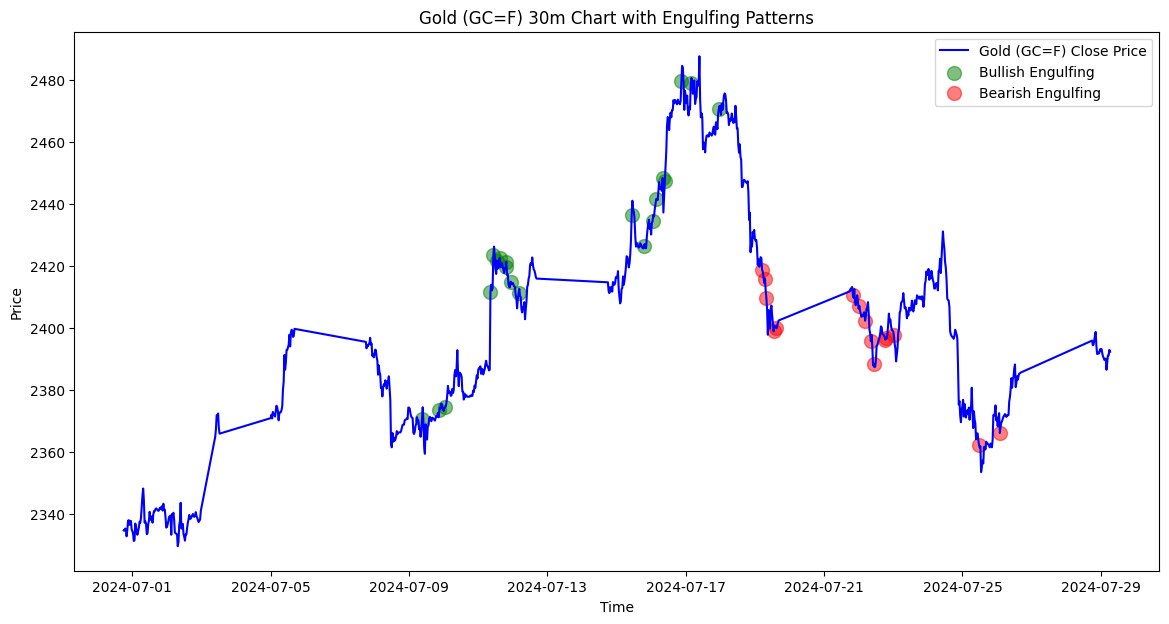

[*********************100%%**********************]  1 of 1 completed


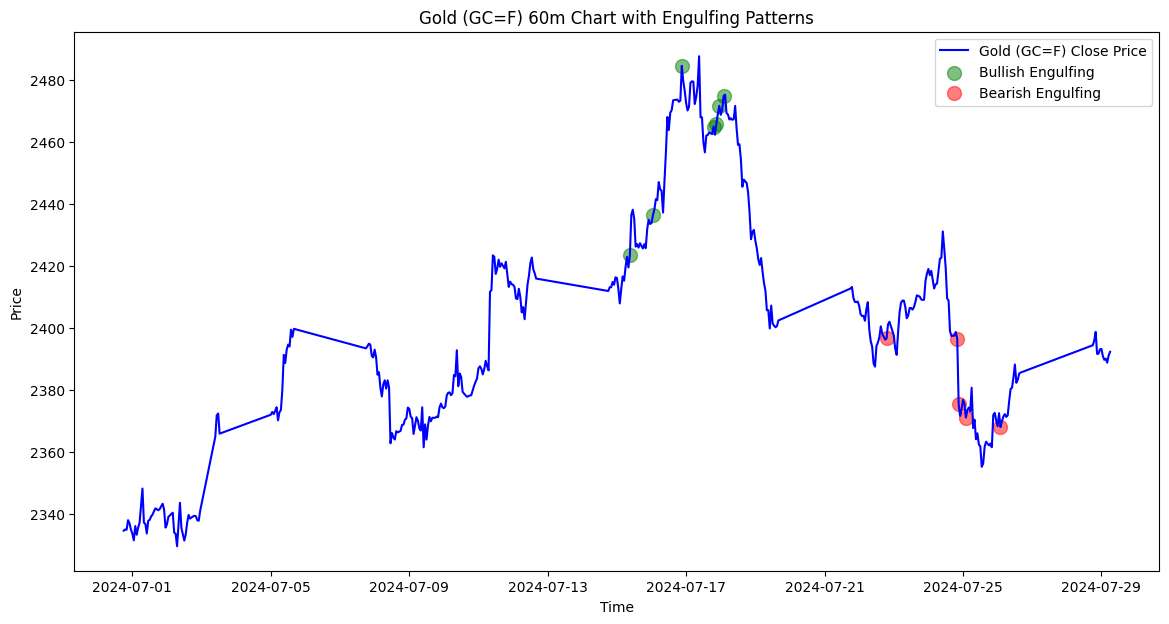

[*********************100%%**********************]  1 of 1 completed


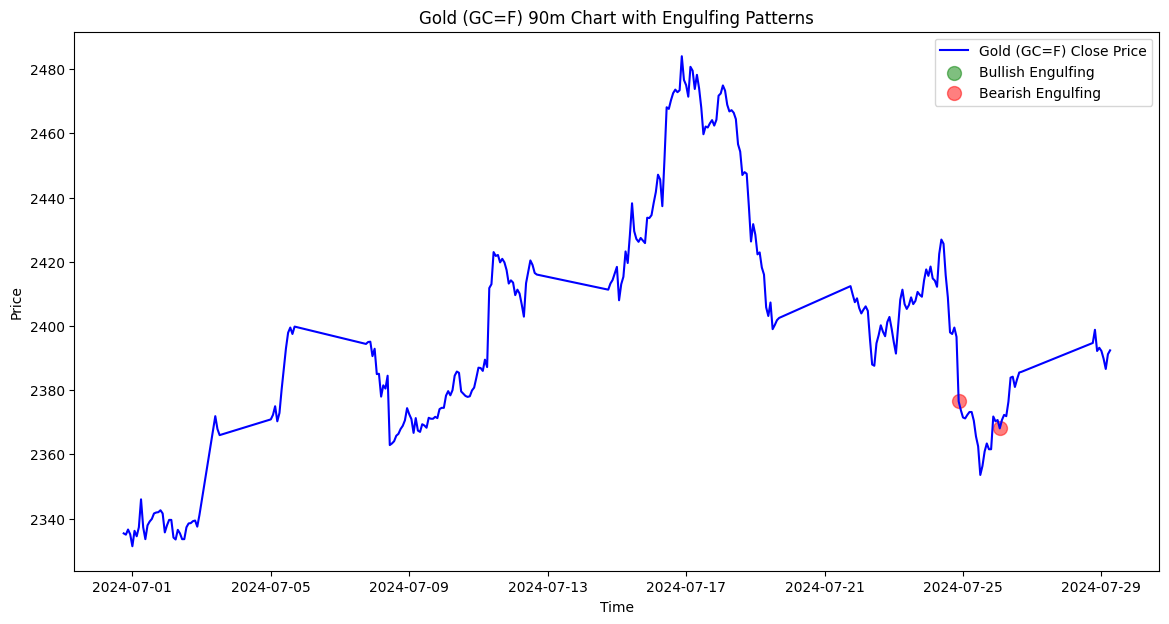

[*********************100%%**********************]  1 of 1 completed


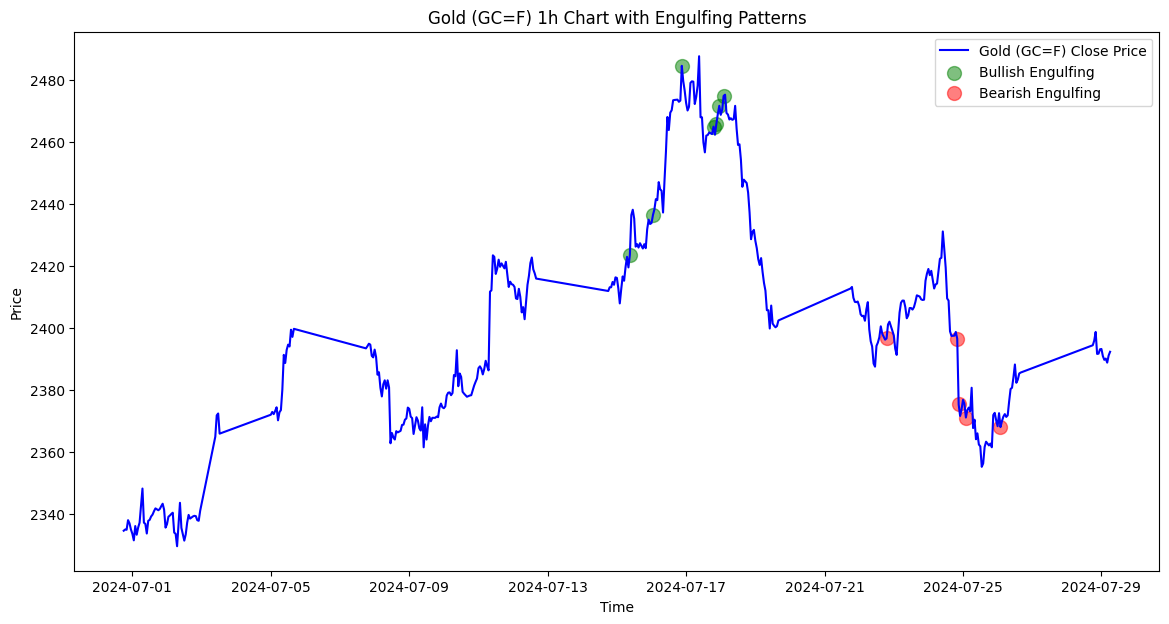

[*********************100%%**********************]  1 of 1 completed


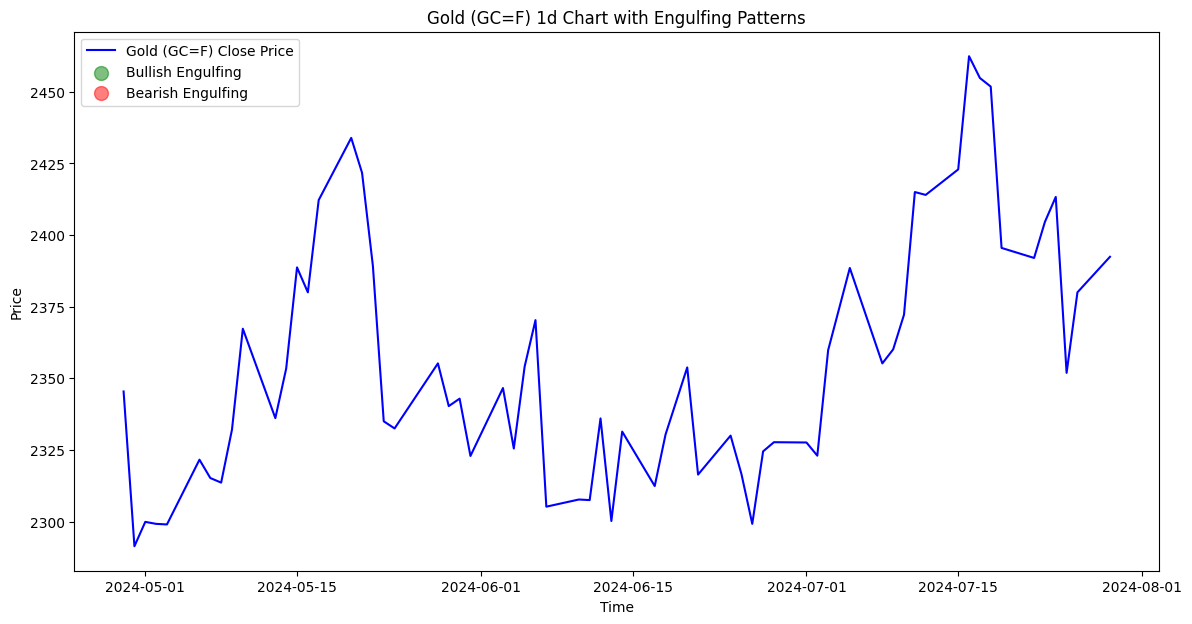

[*********************100%%**********************]  1 of 1 completed


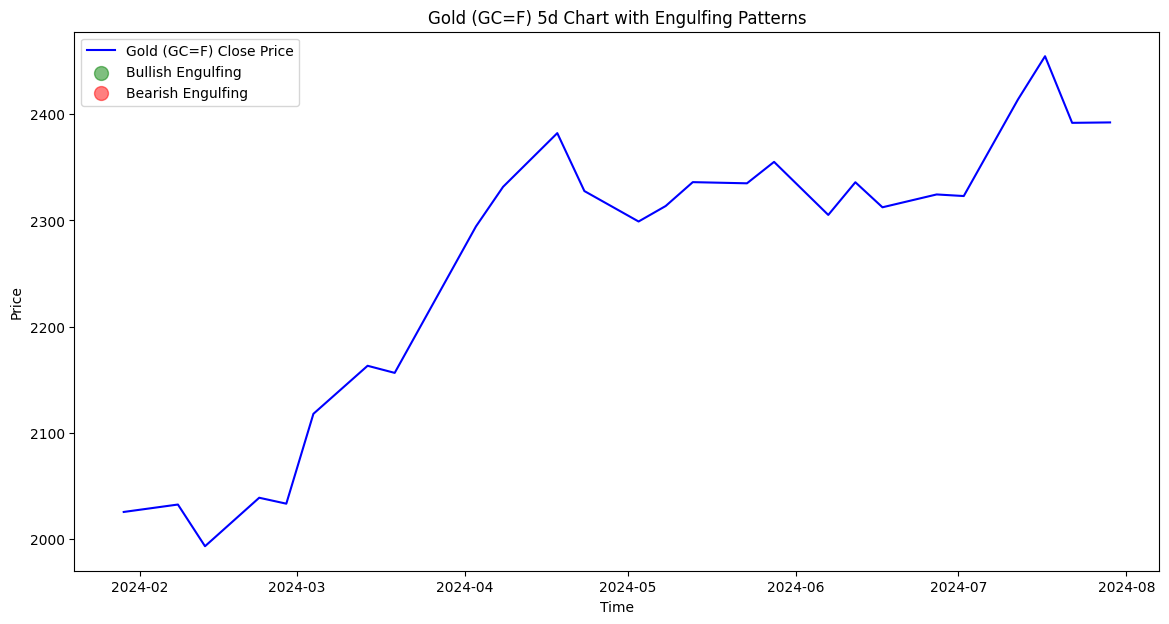

[*********************100%%**********************]  1 of 1 completed


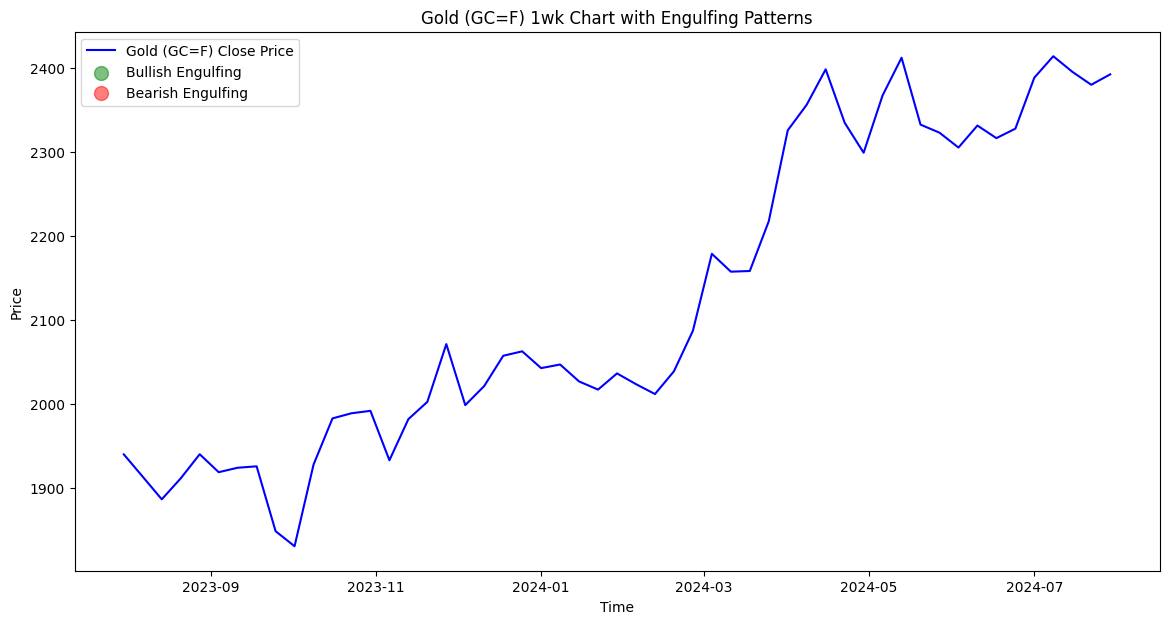

[*********************100%%**********************]  1 of 1 completed


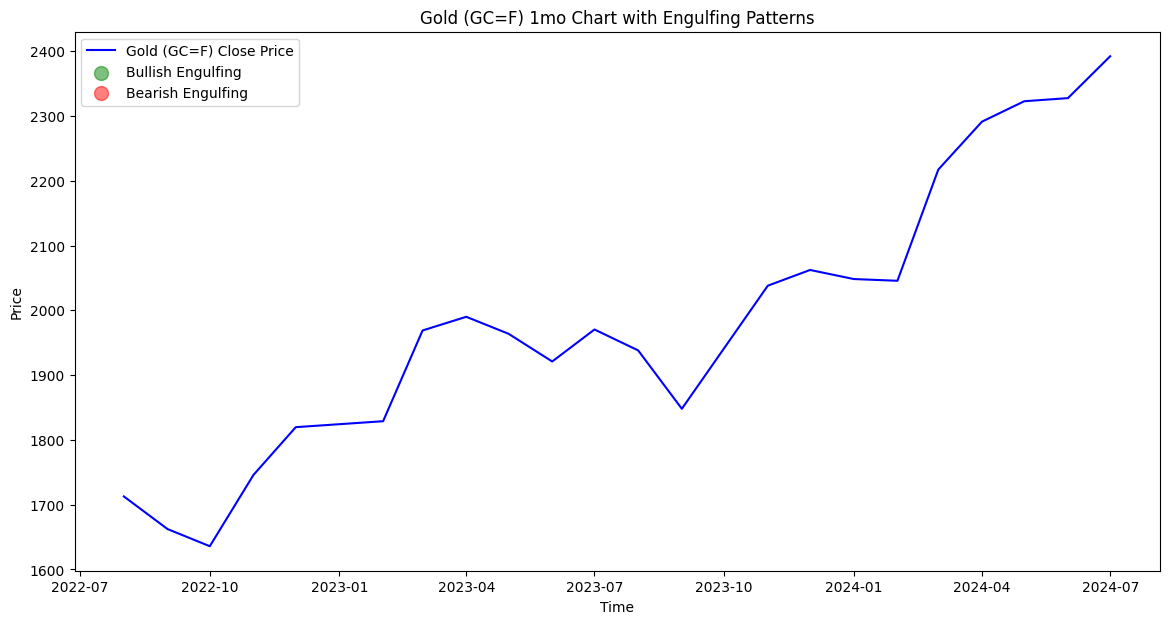

[*********************100%%**********************]  1 of 1 completed


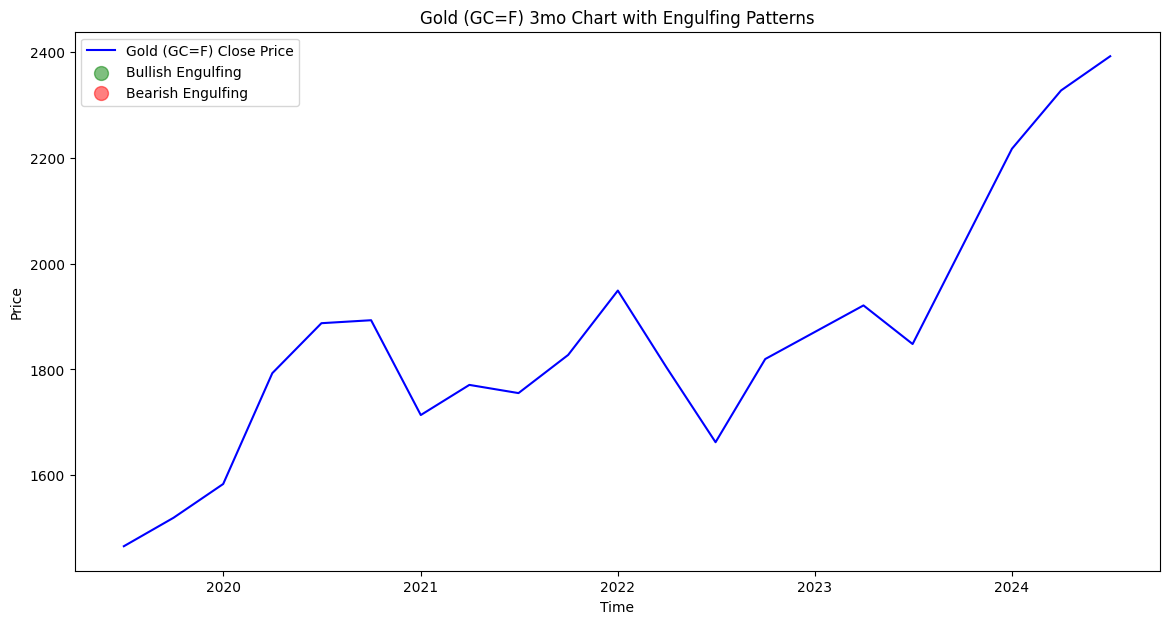

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Liste des unités de temps (ordonnée du plus petit au plus grand)
timeframes = ['30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Mapper les unités de temps avec des périodes compatibles
period_map = {
    '30m': '1mo',
    '60m': '1mo',
    '90m': '1mo',
    '1h': '1mo',
    '1d': '3mo',
    '5d': '6mo',
    '1wk': '1y',
    '1mo': '2y',
    '3mo': '5y'
}

# Fonction pour détecter les patterns englobantes et filtrer par volume et moyennes mobiles
def detect_engulfing(data):
    signals = {'bullish_engulfing': [], 'bearish_engulfing': []}
    data['MA50'] = ta.sma(data['Close'], length=50)
    data['MA200'] = ta.sma(data['Close'], length=200)

    for i in range(1, len(data)):
        if pd.isna(data['MA50'][i]) or pd.isna(data['MA200'][i]):
            continue

        # Bullish Engulfing
        if data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and data['Volume'][i] > data['Volume'][i-1]:
            if data['Close'][i] > data['MA50'][i] and data['MA50'][i] > data['MA200'][i]:
                signals['bullish_engulfing'].append(i)

        # Bearish Engulfing
        elif data['Open'][i] > data['Close'][i-1] and data['Close'][i] < data['Open'][i-1] and data['Volume'][i] > data['Volume'][i-1]:
            if data['Close'][i] < data['MA50'][i] and data['MA50'][i] < data['MA200'][i]:
                signals['bearish_engulfing'].append(i)

    return signals

# Télécharger les données du Gold et détecter les patterns pour chaque unité de temps
gold_ticker = 'GC=F'

for tf in timeframes:
    period = period_map[tf]
    data = yf.download(gold_ticker, period=period, interval=tf)
    if not data.empty:
        signals = detect_engulfing(data)

        # Tracer le graphique
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='Gold (GC=F) Close Price', color='blue')

        # Ajouter les pastilles pour les patterns
        plt.scatter(data.index[signals['bullish_engulfing']], data['Close'][signals['bullish_engulfing']], color='green', s=100, alpha=0.5, label='Bullish Engulfing')
        plt.scatter(data.index[signals['bearish_engulfing']], data['Close'][signals['bearish_engulfing']], color='red', s=100, alpha=0.5, label='Bearish Engulfing')

        plt.title(f'Gold (GC=F) {tf} Chart with Engulfing Patterns')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {gold_ticker} with interval {tf}")


Les résultats ne sont pas assez intéréssants, il faudrait être plus sélectifs dans le signal de validation du pattern d'englobante. Je pense qu'il faut absolument que ce soit une fin de tendance est la règle la plus importante ainsi que la taille du corps de la bougie englobante soit plus gros que toute la bougie précédente. Je pense qu'avec ces 2 règles ont aura nos points d'entrée.


Ce script applique les nouvelles règles pour détecter les patterns englobantes :

Le pattern doit se produire à la fin d'une tendance (au moins deux bougies consécutives dans la direction opposée).
Le corps de la bougie englobante doit être plus grand que la bougie précédente.
Les points d'entrée potentiels seront marqués par des pastilles vertes (englobantes haussières) et rouges (englobantes baissières) sur les graphiques du gold pour chaque unité de temps spécifiée.

[*********************100%%**********************]  1 of 1 completed


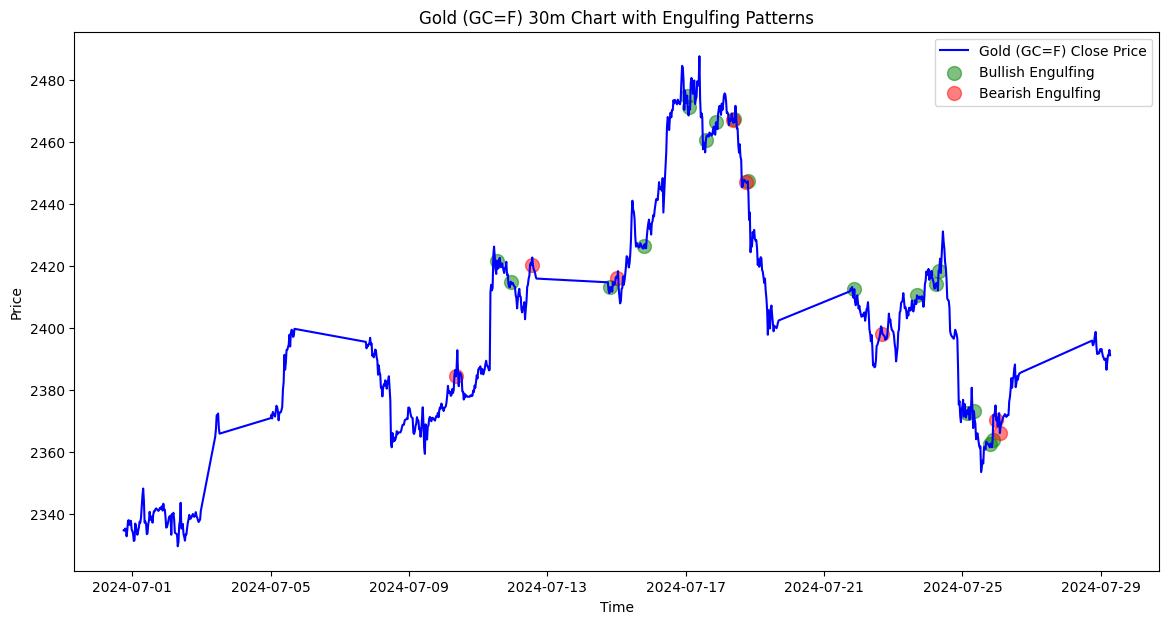

[*********************100%%**********************]  1 of 1 completed


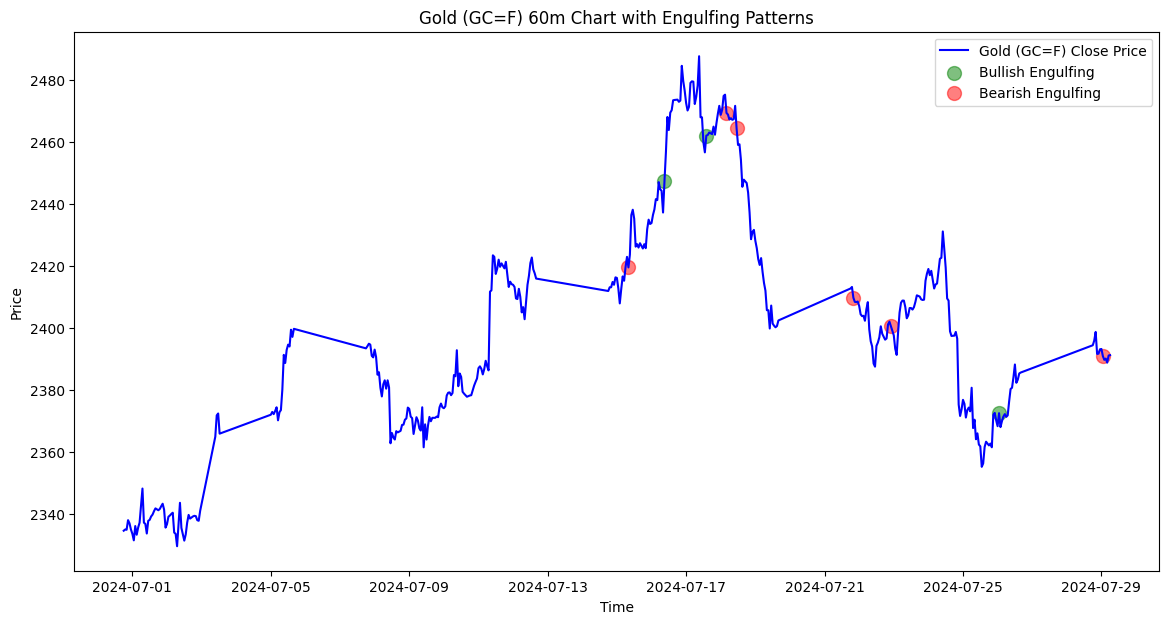

[*********************100%%**********************]  1 of 1 completed


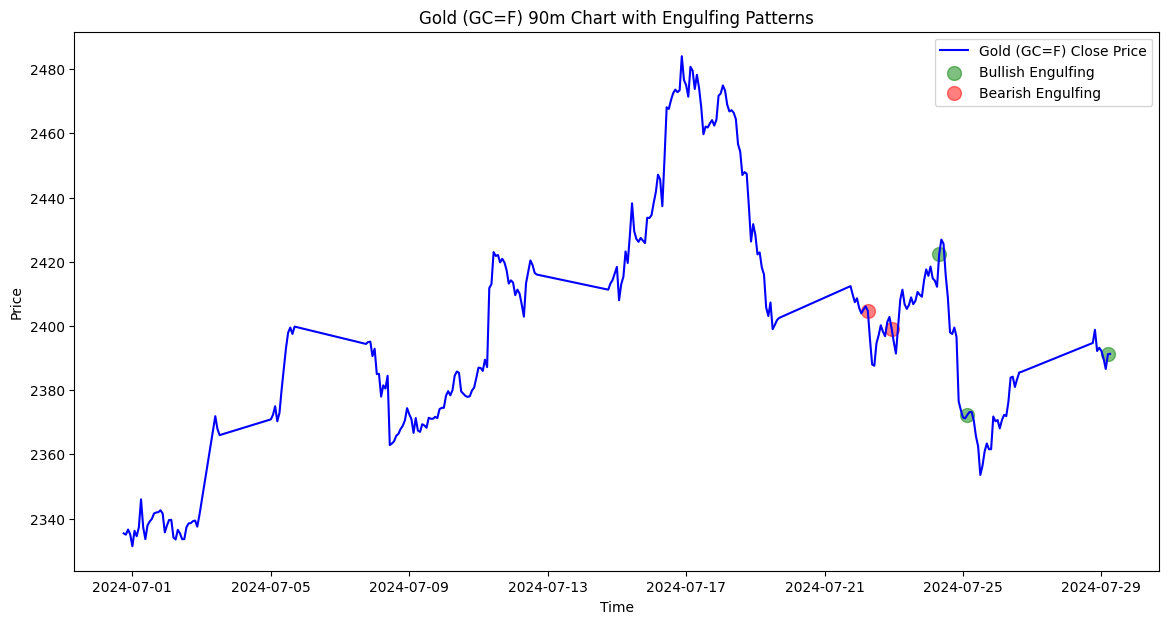

[*********************100%%**********************]  1 of 1 completed


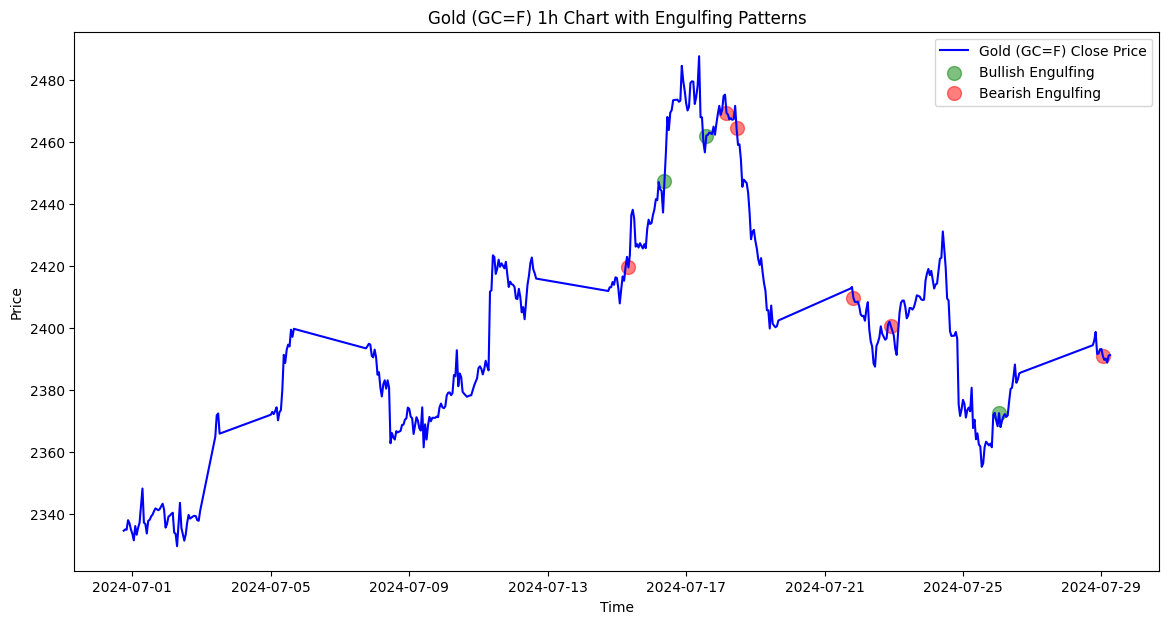

[*********************100%%**********************]  1 of 1 completed


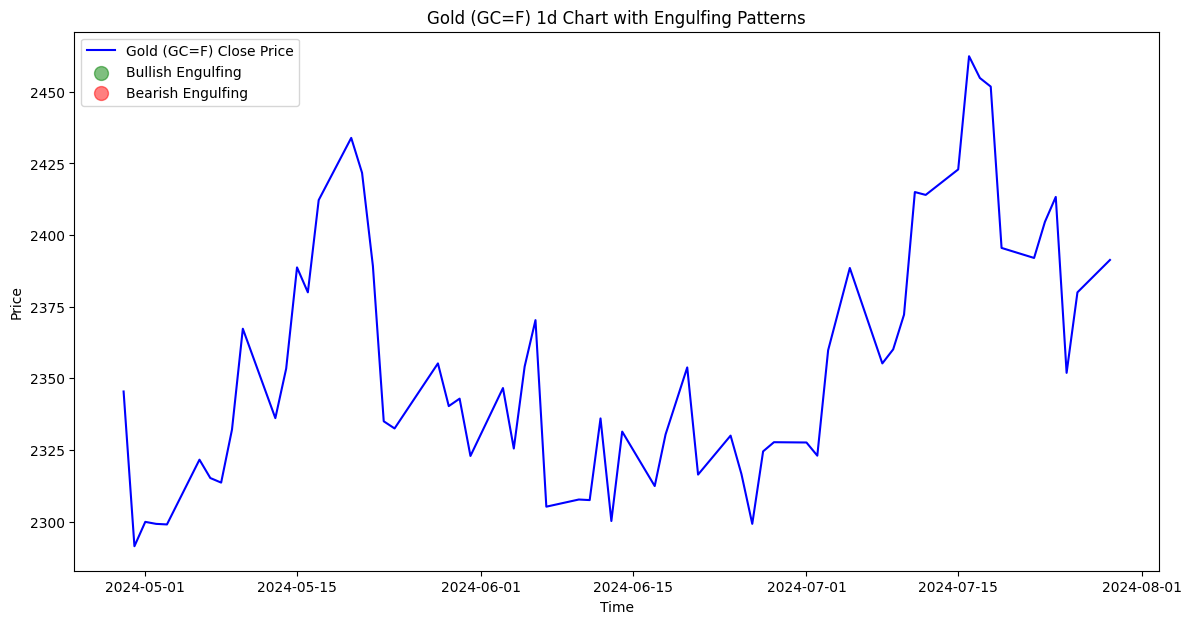

[*********************100%%**********************]  1 of 1 completed


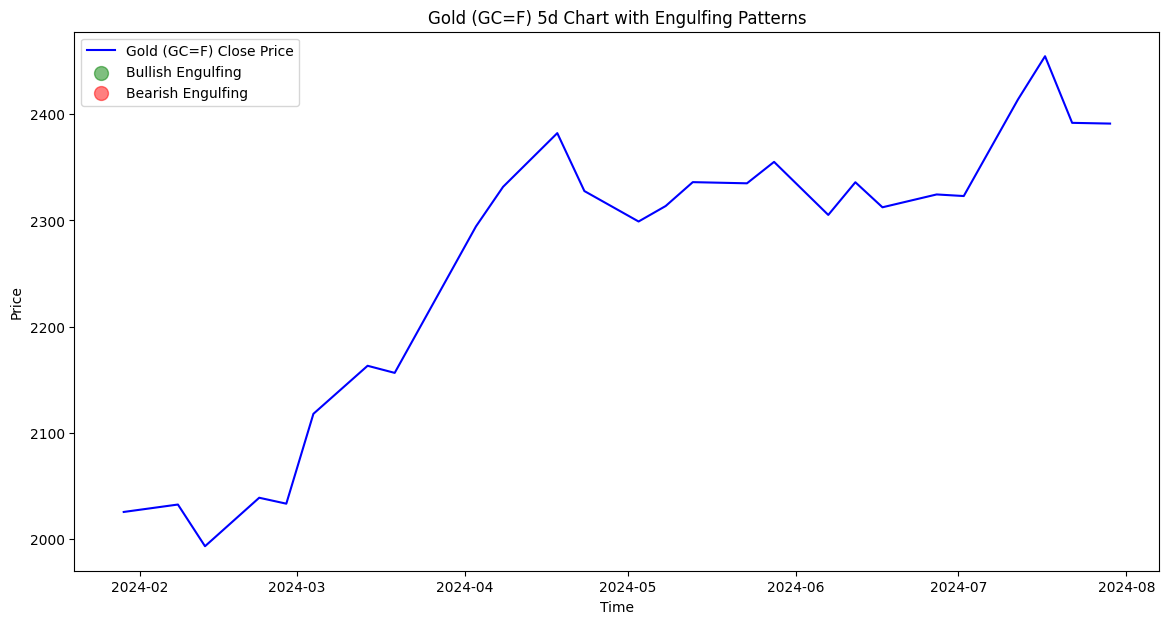

[*********************100%%**********************]  1 of 1 completed


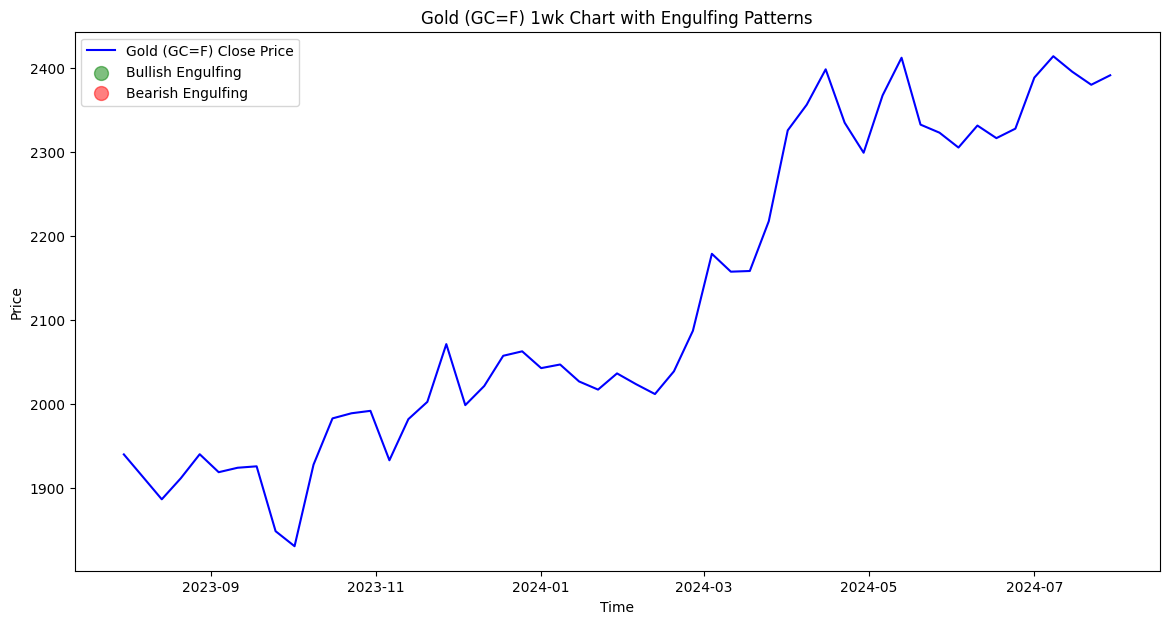

[*********************100%%**********************]  1 of 1 completed


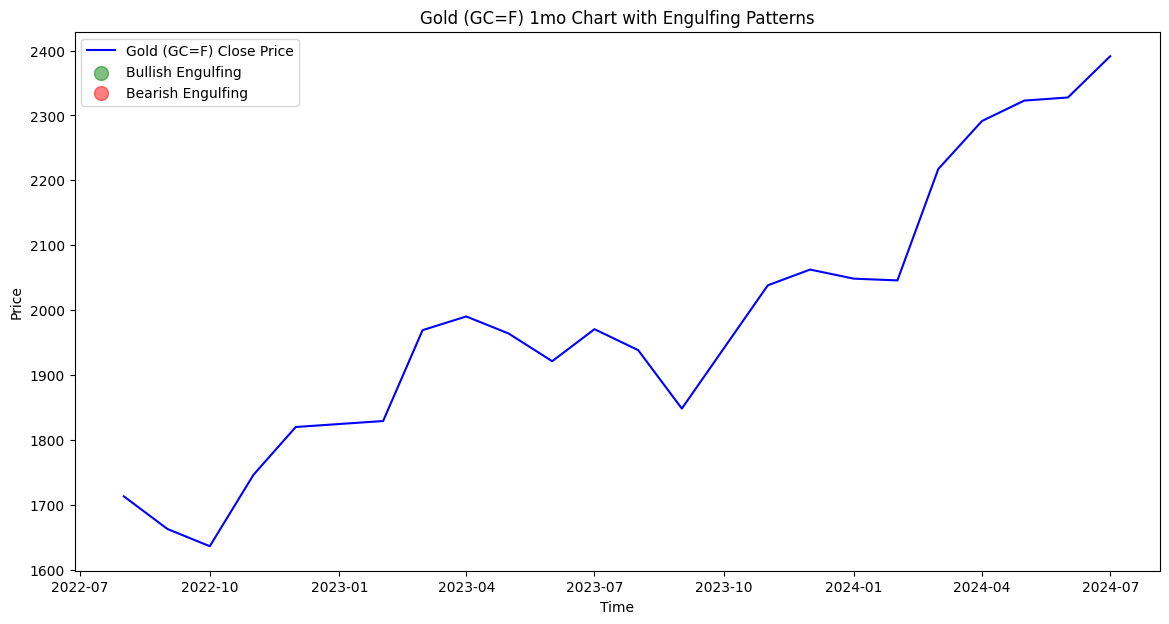

[*********************100%%**********************]  1 of 1 completed


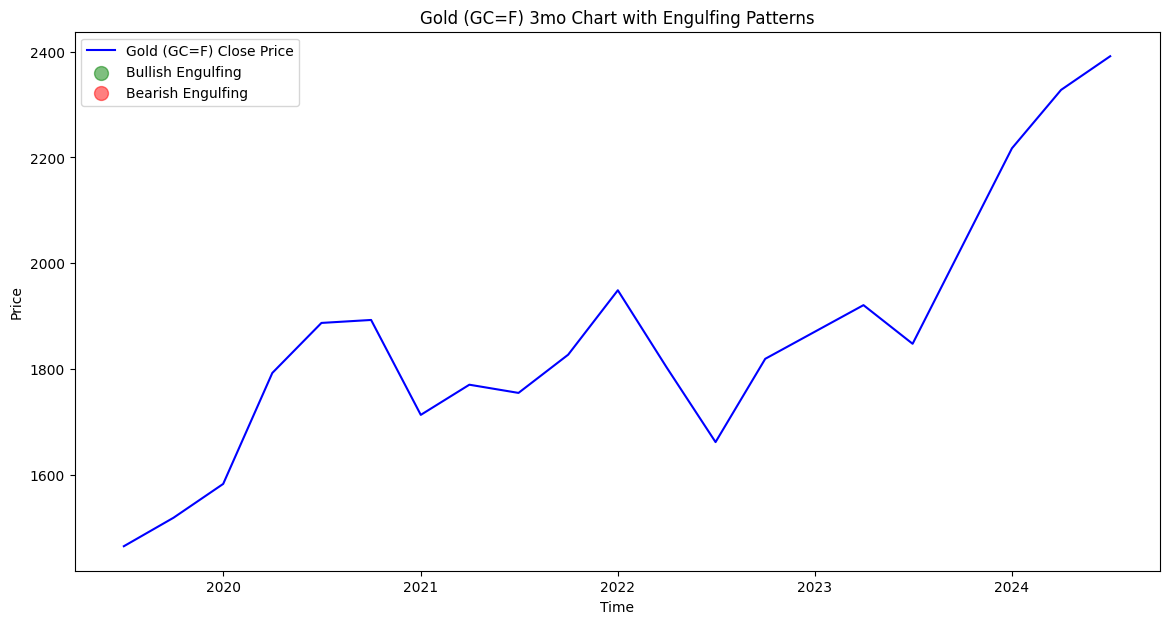

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

# Liste des unités de temps (ordonnée du plus petit au plus grand)
timeframes = ['30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']

# Mapper les unités de temps avec des périodes compatibles
period_map = {
    '30m': '1mo',
    '60m': '1mo',
    '90m': '1mo',
    '1h': '1mo',
    '1d': '3mo',
    '5d': '6mo',
    '1wk': '1y',
    '1mo': '2y',
    '3mo': '5y'
}

# Fonction pour détecter les patterns englobantes et filtrer par tendance et taille de la bougie
def detect_engulfing(data):
    signals = {'bullish_engulfing': [], 'bearish_engulfing': []}
    data['MA50'] = ta.sma(data['Close'], length=50)
    data['MA200'] = ta.sma(data['Close'], length=200)

    for i in range(2, len(data)):
        if pd.isna(data['MA50'][i]) or pd.isna(data['MA200'][i]):
            continue

        # Fin de tendance haussière pour englobante baissière
        if data['Close'][i-1] > data['Open'][i-1] and data['Close'][i-2] > data['Open'][i-2]:
            # Bearish Engulfing
            if data['Open'][i] > data['Close'][i-1] and data['Close'][i] < data['Open'][i-1] and (data['Open'][i] - data['Close'][i]) > (data['Close'][i-1] - data['Open'][i-1]):
                signals['bearish_engulfing'].append(i)

        # Fin de tendance baissière pour englobante haussière
        if data['Close'][i-1] < data['Open'][i-1] and data['Close'][i-2] < data['Open'][i-2]:
            # Bullish Engulfing
            if data['Open'][i] < data['Close'][i-1] and data['Close'][i] > data['Open'][i-1] and (data['Close'][i] - data['Open'][i]) > (data['Open'][i-1] - data['Close'][i-1]):
                signals['bullish_engulfing'].append(i)

    return signals

# Télécharger les données du Gold et détecter les patterns pour chaque unité de temps
gold_ticker = 'GC=F'

for tf in timeframes:
    period = period_map[tf]
    data = yf.download(gold_ticker, period=period, interval=tf)
    if not data.empty:
        signals = detect_engulfing(data)

        # Tracer le graphique
        plt.figure(figsize=(14, 7))
        plt.plot(data['Close'], label='Gold (GC=F) Close Price', color='blue')

        # Ajouter les pastilles pour les patterns
        plt.scatter(data.index[signals['bullish_engulfing']], data['Close'][signals['bullish_engulfing']], color='green', s=100, alpha=0.5, label='Bullish Engulfing')
        plt.scatter(data.index[signals['bearish_engulfing']], data['Close'][signals['bearish_engulfing']], color='red', s=100, alpha=0.5, label='Bearish Engulfing')

        plt.title(f'Gold (GC=F) {tf} Chart with Engulfing Patterns')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
    else:
        print(f"No data available for {gold_ticker} with interval {tf}")
